<a href="https://colab.research.google.com/github/abhishekchukka/Codeway_internship/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("/content/drive/MyDrive/datasets/spam.csv", encoding="latin-1")
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
col2=data["Unnamed: 2"].isna().size
col3=data["Unnamed: 3"].isna().size
col4=data["Unnamed: 4"].isna().size
print("Unnamed 2:{}\nUnnamed 3:{}\nUnnamed 4:{}\n".format(col2,col3,col4))
#since all the remaining columns are nans theres no point in cosidering them

Unnamed 2:5572
Unnamed 3:5572
Unnamed 4:5572



In [9]:
data=data.iloc[:,[0,1]]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data=data.rename(columns={"v1":"y","v2":"x"})
data["y"].size

5572

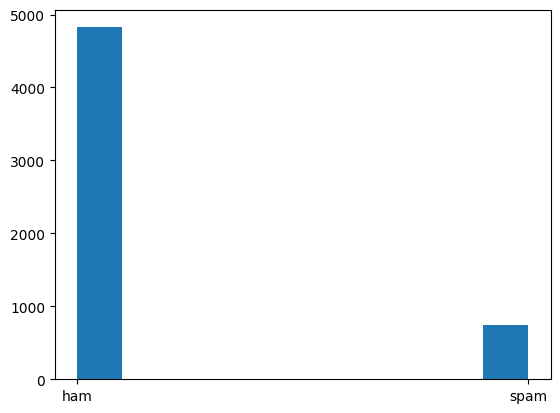

<Figure size 300x300 with 0 Axes>

spam:747
Not-spam:4825


In [11]:
plt.hist(data["y"])
plt.figure(figsize=[3,3])
plt.show()
not_spam=data[data["y"]=="ham"]["y"].size
spam=data[data["y"]=="spam"]["y"].size
print("spam:{}\nNot-spam:{}".format(spam,not_spam))

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["y"]=le.fit_transform(data["y"])
data["y"].value_counts()
#0:not-spam
#1:spam

0    4825
1     747
Name: y, dtype: int64

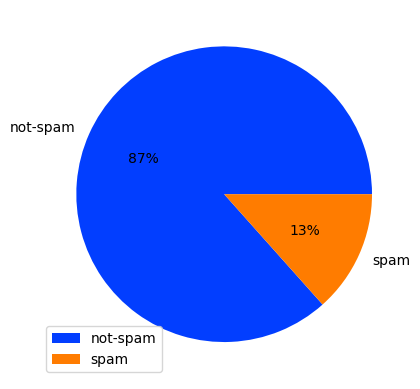

In [13]:
palette_color = sns.color_palette('bright')
plt.pie(data["y"].value_counts(),labels=["not-spam","spam"], autopct='%.0f%%',colors=palette_color)

plt.legend()
plt.show()

In [18]:
#tokenising words
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
ps=PorterStemmer()
wl=WordNetLemmatizer()
sw=set(stopwords.words("english"))
def cleaning(text):
  text=text.lower()
  words=nltk.word_tokenize(text)
  words=[word for word in words if word not in sw and word not in string.punctuation]
  words=[ps.stem(word) for word in words]
  words=[wl.lemmatize(word) for word in words]
  text=" ".join(words)
  return text

In [37]:
data["organised text"]=data["x"].apply(cleaning)

In [29]:
data


,y,x,organised text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like 'd interest buy someth el n...


In [55]:
from wordcloud import WordCloud
# text=[("".join(sent)) for sent in data["organised text"]]
# text=[char for char in text not in string.punctuation]
text=data['organised text'].values
text

array(['go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...',
       'ok lar ... joke wif u oni ...',
       "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question std txt rate c 's appli 08452810075over18 's",
       ..., 'piti mood ... suggest',
       "guy bitch act like 'd interest buy someth el next week gave u free",
       'rofl true name'], dtype=object)

In [57]:
ntext=""
for i in text:
  if(i not in sw):
     ntext+=i
  else:
    continue
type(ntext)
print(ntext[:500])

go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...ok lar ... joke wif u oni ...free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question std txt rate c 's appli 08452810075over18 'su dun say earli hor ... u c alreadi say ...nah n't think goe usf live around thoughfreemsg hey darl 's 3 week 's word back 'd like fun still tb ok xxx std chg send å£1.50 rcveven brother like speak treat like aid patentper request 'mell mell oru


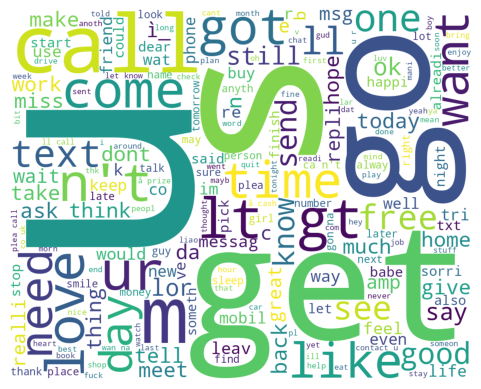

In [107]:
wc = WordCloud(background_color='white',stopwords = ['meta'], width = 1000, height = 800).generate(ntext)
# plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")

plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words="english")
x=tf.fit_transform(data["organised text"])
# y=data["y"]
x

<5572x7191 sparse matrix of type '<class 'numpy.float64'>'
	with 42609 stored elements in Compressed Sparse Row format>

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [75]:
lr_pred=classifier.predict(x_test)

[[1432    2]
 [  89  149]]
The accuracy report of Linear Regression :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1434
           1       0.99      0.63      0.77       238

    accuracy                           0.95      1672
   macro avg       0.96      0.81      0.87      1672
weighted avg       0.95      0.95      0.94      1672

Overall Accuracy(%): 94.55741626794259
Overall Recall: 0.6260504201680672
Overall Precision: 0.9867549668874173
Overall f1_score: 0.7660668380462726


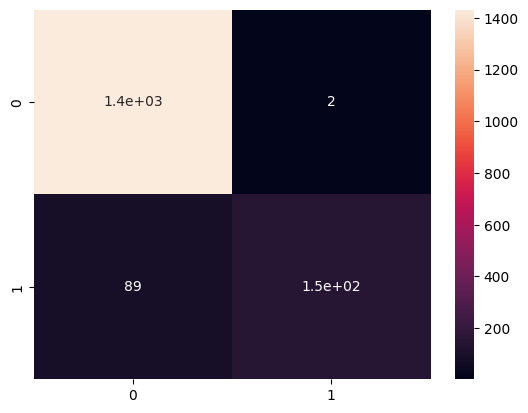

In [101]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,recall_score,precision_score
cm=confusion_matrix(y_test,lr_pred)
print(cm)
sns.heatmap(cm,annot=True)
print("The accuracy report of Linear Regression :\n"+classification_report(y_test,lr_pred))
print("Overall Accuracy(%):",accuracy_score(y_test,lr_pred)*100)
print("Overall Recall:",recall_score(y_test,lr_pred))
print("Overall Precision:",precision_score(y_test,lr_pred))
print("Overall f1_score:",f1_score(y_test,lr_pred))

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(x_train,y_train)


MultinomialNB()

In [85]:
nb_pred=nb_model.predict(x_test)

[[1434    0]
 [  66  172]]
The accuracy report of Naive Bayes :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.72      0.84       238

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

Overall Accuracy(%): 96.05263157894737
Overall Recall: 0.7226890756302521
Overall Precision: 1.0
Overall f1_score: 0.8390243902439024


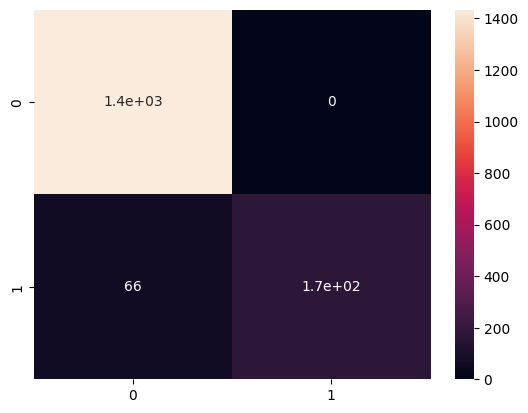

In [100]:
cm1=confusion_matrix(y_test,nb_pred)
print(cm1)
sns.heatmap(cm1,annot=True)
print("The accuracy report of Naive Bayes :\n"+classification_report(y_test,nb_pred))
print("Overall Accuracy(%):",accuracy_score(y_test,nb_pred)*100)
print("Overall Recall:",recall_score(y_test,nb_pred))
print("Overall Precision:",precision_score(y_test,nb_pred))
print("Overall f1_score:",f1_score(y_test,nb_pred))

In [89]:
from sklearn.svm import LinearSVC
svc_model=LinearSVC()
svc_model.fit(x_train,y_train)

LinearSVC()

In [90]:
sv_pred=svc_model.predict(x_test)


[[1433    1]
 [  34  204]]
The Classification Report of Support Vector Machine:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1434
           1       1.00      0.86      0.92       238

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Overall Accuracy(%): 97.9066985645933
Overall Recall: 0.8571428571428571
Overall Precision: 0.9951219512195122
Overall f1_score: 0.9209932279909706


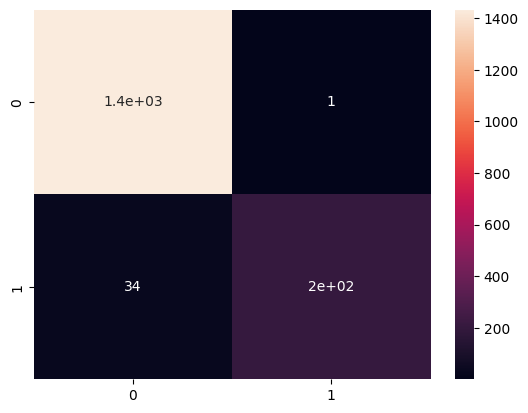

In [99]:
cm3=confusion_matrix(y_test,sv_pred)
print(cm3)
sns.heatmap(cm3,annot=True)
print("The Classification Report of Support Vector Machine:\n",classification_report(y_test,sv_pred))
print("Overall Accuracy(%):",accuracy_score(y_test,sv_pred)*100)
print("Overall Recall:",recall_score(y_test,sv_pred))
print("Overall Precision:",precision_score(y_test,sv_pred))
print("Overall f1_score:",f1_score(y_test,sv_pred))